# Creator -> SARTHAK ARORA

In [ ]:
#Beginner Level Task

# TASK-2 -> Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
DatasetLink: https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [ ]:
# Importing Libraries needed and installing if required.

In [121]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib as mpl

In [122]:
pip install tensorflow

     -------------------------------------- 24.4/24.4 MB 964.9 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.2 MB/s eta 0:00:00
     ------------------------------------ 895.7/895.7 kB 550.3 kB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
Note: you may need to restart the kernel to use updated packages.


In [123]:
from tensorflow import keras
from keras.layers import Dense, LSTM
from keras.models import Sequential, load_model
from sklearn.metrics import mean_squared_error

In [96]:
df.sample(10)
df.shape
df.columns
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


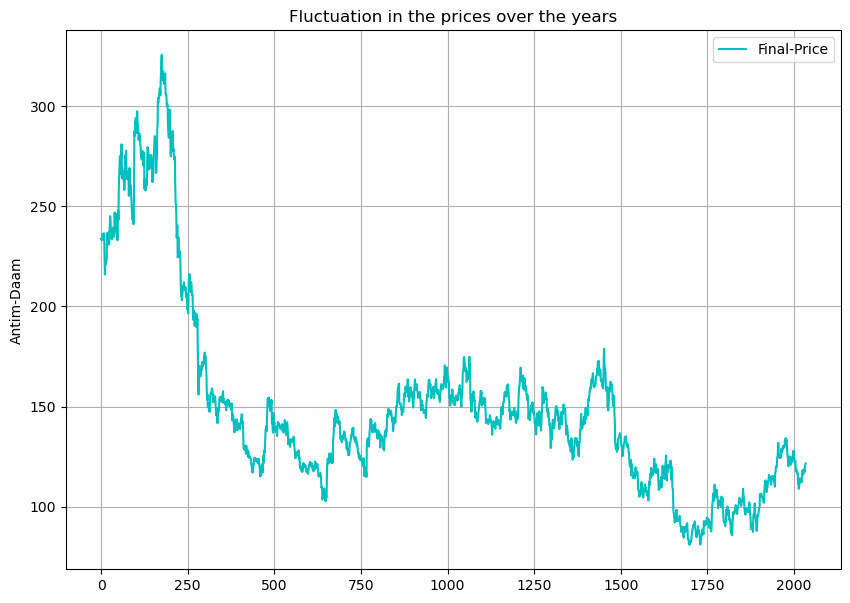

In [8]:
plt.figure(figsize=(10,6))
df['Close'].plot(kind='line',figsize=(10,7),color='c',label='Final-Price') #for column CLOSE.
plt.ylabel('Antim-Daam')
plt.legend(loc="upper right")   #give meaning to a visualization i.e. assigning meaning to the various plot elements.
plt.title('Fluctuation in the prices over the years')
plt.grid()

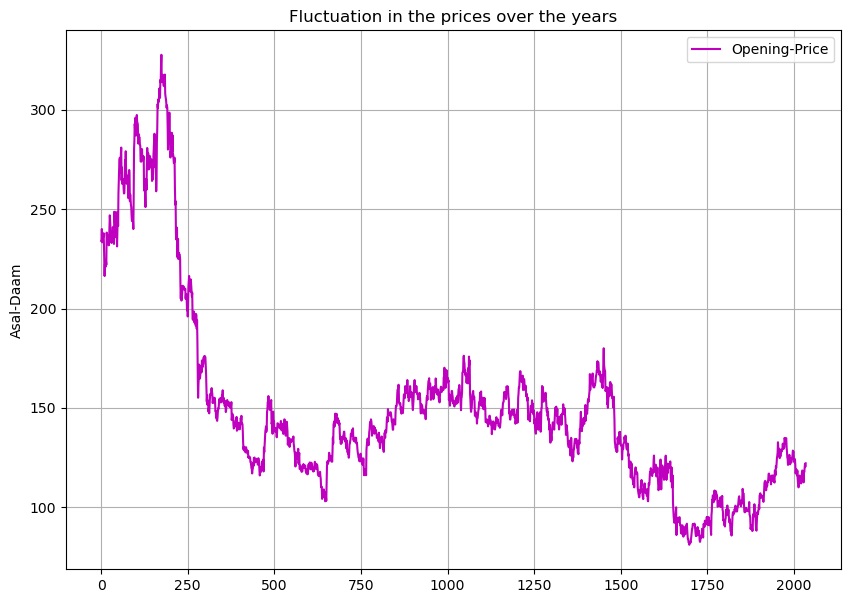

In [11]:
plt.figure(figsize=(10,6))
df['Open'].plot(kind='line',figsize=(10,7),color='m',label='Opening-Price') #for column OPEN.
plt.ylabel('Asal-Daam')
plt.legend(loc="upper right")   #give meaning to a visualization i.e. assigning meaning to the various plot elements.
plt.title('Fluctuation in the prices over the years')
plt.grid()

In [12]:
d1=df.reset_index()['Close']
d1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

C:\Users\saart\AppData\Local\Temp\ipykernel_13124\3145595016.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),annot=True,cmap='PuBu')


<Axes: >

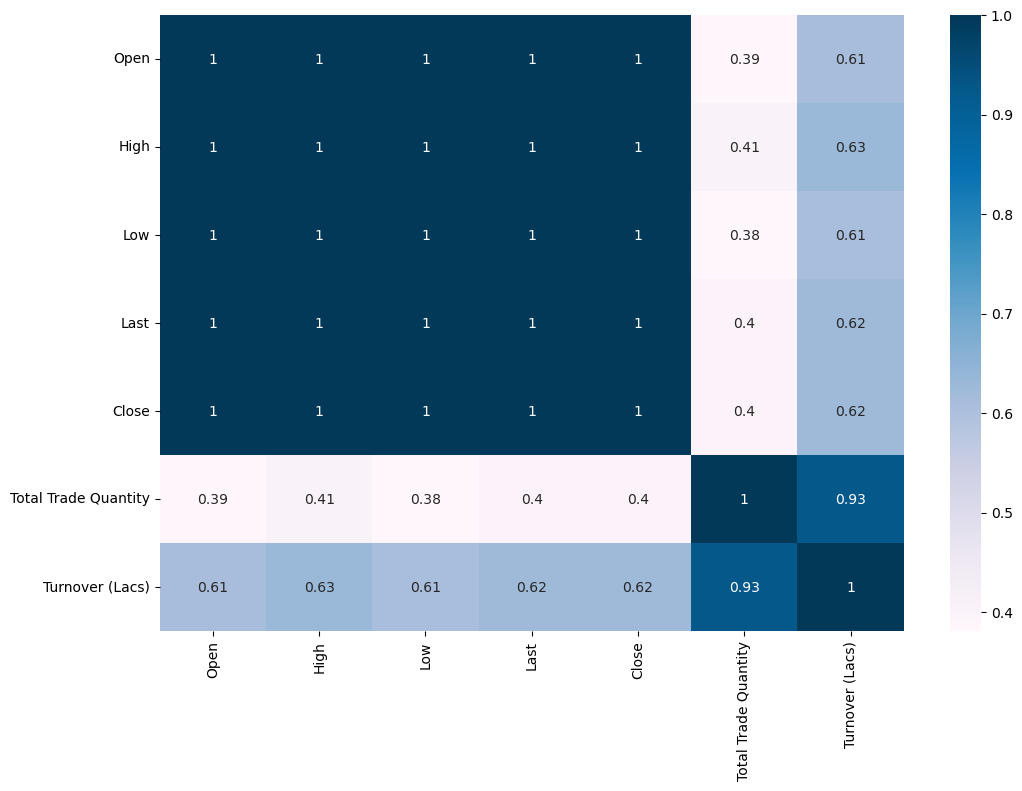

In [25]:
plt.figure(figsize=(12,8))
sb.heatmap(df.corr(),annot=True,cmap='PuBu')

<Axes: ylabel='Turnover (Lacs)'>

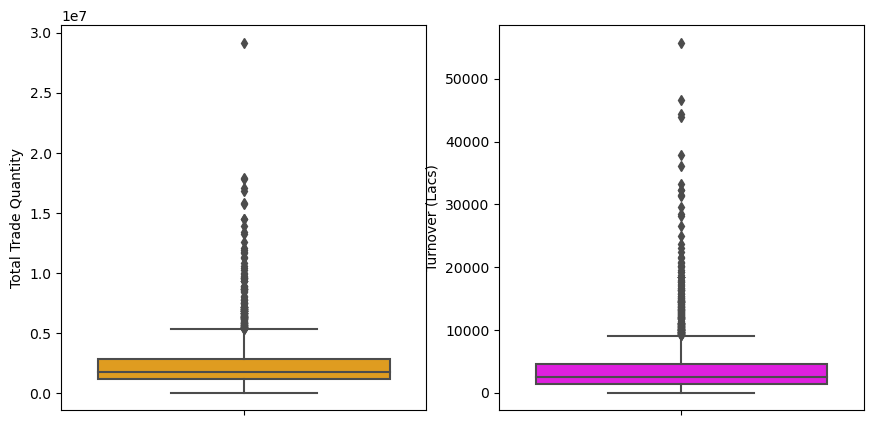

In [28]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sb.boxplot(data=df,y='Total Trade Quantity',color='orange')
plt.subplot(1,3,2)
sb.boxplot(data=df,y='Turnover (Lacs)',color='magenta')

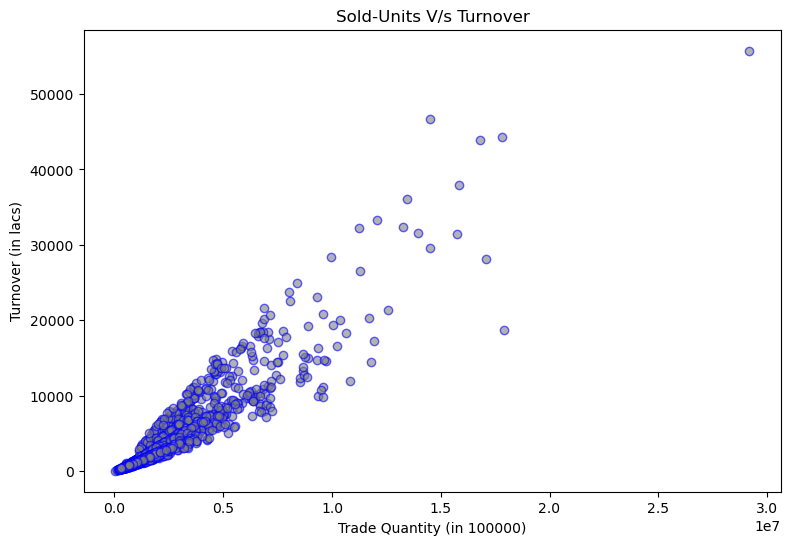

In [29]:
fs=plt.figure(figsize=(9,6))
plt.scatter(df['Total Trade Quantity'],df['Turnover (Lacs)'], alpha=0.6, edgecolor='b', color='grey')
plt.xlabel("Trade Quantity (in 100000)")
plt.ylabel("Turnover (in lacs)")
plt.title("Sold-Units V/s Turnover")
plt.show()

In [30]:
t_set = df[['Open']]
t_set = pd.DataFrame(t_set)
t_set

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


In [99]:
from sklearn.preprocessing import MinMaxScaler  #Transform features by scaling each feature to a given range.
scaler = MinMaxScaler(feature_range=(0,1))
t_set_scaler=scaler.fit_transform(np.array(d1).reshape(-1,1)) # We have minimised train to t. 
t_set_scaler

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [100]:
def dataset(dataset,time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0,1,2,3-----99,100.
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X) 
    return np.array(Y)

In [101]:
from sklearn.preprocessing import MinMaxScaler  #Transform features by scaling each feature to a given range.
scaler = MinMaxScaler(feature_range=(0,1))
t_set_scaler=scaler.fit_transform(np.array(d1).reshape(-1,1))
t_set_scaler

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [102]:
train_size1= int(len(t_set_scaler)*0.67)
test_size1=int(len(t_set_scaler))-train_size1
train_data1,test_data1=t_set_scaler[0:train_size1,:],t_set_scaler[train_size1:len(df),:1] 
train_size1

1363

In [103]:
def dataset(dataset,time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0,1,2,3-----99,100.
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y) 

In [104]:
time_step=100
x_t, y_t=dataset(train_data1, time_step)
x_test, y_test=dataset(test_data1, time_step)

In [105]:
print(x_t.shape,y_train.shape)

(1262, 100) (1262,)


In [106]:
x_test.shape

(571, 100)

In [107]:
y_test.shape

(571,)

In [108]:
x_t = x_t.reshape(x_t.shape[0],x_t.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [124]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics='acc')

In [125]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.fit(x_t, y_t, validation_data = (x_test, y_test), epochs = 80, batch_size = 65, verbose = 1)

Epoch 1/80
20/20 [==============================] - 19s 390ms/step - loss: 0.0265 - acc: 7.9239e-04 - val_loss: 0.0047 - val_acc: 0.0018
Epoch 2/80
20/20 [==============================] - 4s 212ms/step - loss: 0.0032 - acc: 7.9239e-04 - val_loss: 0.0013 - val_acc: 0.0018
Epoch 3/80
20/20 [==============================] - 4s 176ms/step - loss: 0.0014 - acc: 7.9239e-04 - val_loss: 0.0012 - val_acc: 0.0018
Epoch 4/80
20/20 [==============================] - 3s 168ms/step - loss: 0.0014 - acc: 7.9239e-04 - val_loss: 0.0010 - val_acc: 0.0018
Epoch 5/80
20/20 [==============================] - 3s 166ms/step - loss: 0.0013 - acc: 7.9239e-04 - val_loss: 0.0014 - val_acc: 0.0018
Epoch 6/80
20/20 [==============================] - 4s 215ms/step - loss: 0.0013 - acc: 7.9239e-04 - val_loss: 8.6754e-04 - val_acc: 0.0018
Epoch 7/80
20/20 [==============================] - 4s 210ms/step - loss: 0.0013 - acc: 7.9239e-04 - val_loss: 0.0011 - val_acc: 0.0018
Epoch 8/80
20/20 [=========================

In [129]:
train_predict1=model.predict(x_t)
test_predict1=model.predict(x_test)
#Transform back to original form
train_predict1=scaler.inverse_transform(train_predict1)
test_predict1=scaler.inverse_transform(test_predict1)

18/18 [==============================] - 1s 45ms/step


In [130]:
math.sqrt(mean_squared_error(y_t,train_predict1))
math.sqrt(mean_squared_error(y_test,test_predict1))

113.46793844029595

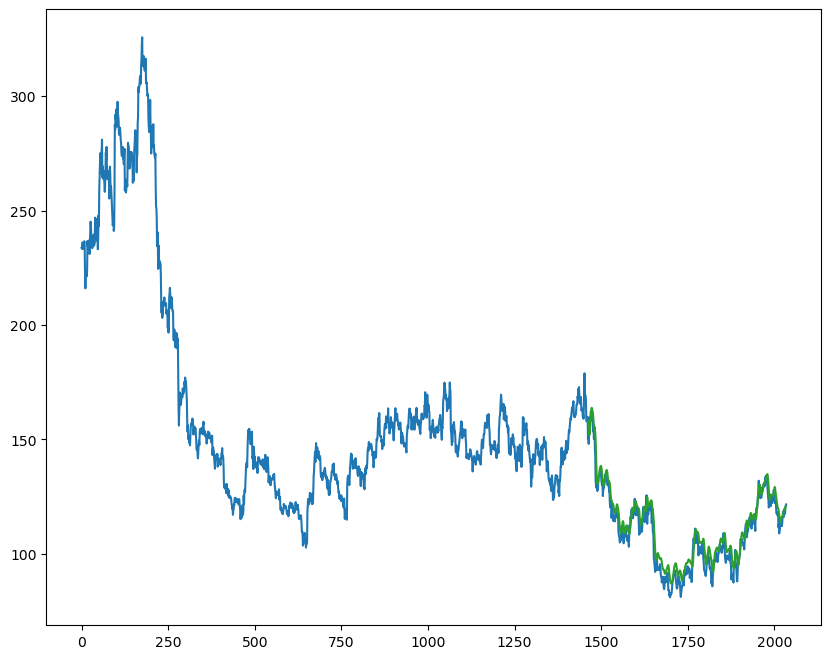

In [132]:
### Plotting 

# shift train predictions 
look_back=100
trainPredictPlot = np.empty_like(t_set_scaler)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict1)+look_back, :] = train_predict1

# shift test predictions
testPredictPlot = np.empty_like(t_set_scaler)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(d1)-1, :] = test_predict1

# plot baseline and predict
plt.figure(figsize=(10,8))
plt.plot(scaler.inverse_transform(t_set_scaler))
plt.plot(tPredictPlot)
plt.plot(testPredictPlot)
plt.show()